In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# ***One-Hot Encoding on Species Column.***

In [79]:
add_col = pd.get_dummies(df['Species'])
add_col

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [80]:
df.drop(['Species'], axis = 1 ,inplace = True)

In [81]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [82]:
df = df.join(add_col)

In [83]:
df

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Weight     159 non-null    float64
 1   Length1    159 non-null    float64
 2   Length2    159 non-null    float64
 3   Length3    159 non-null    float64
 4   Height     159 non-null    float64
 5   Width      159 non-null    float64
 6   Bream      159 non-null    uint8  
 7   Parkki     159 non-null    uint8  
 8   Perch      159 non-null    uint8  
 9   Pike       159 non-null    uint8  
 10  Roach      159 non-null    uint8  
 11  Smelt      159 non-null    uint8  
 12  Whitefish  159 non-null    uint8  
dtypes: float64(6), uint8(7)
memory usage: 8.7 KB


### 1. Plot a bar chart showing count of individual species?

In [85]:
df1 = pd.read_csv("Fish_dataset.csv")

In [86]:
df1['Species'].value_counts()


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


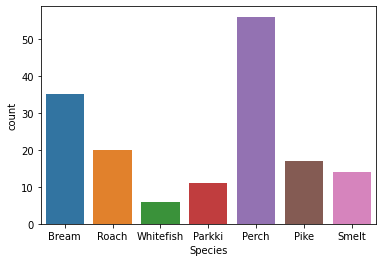

In [87]:
sns.countplot(df1['Species'])

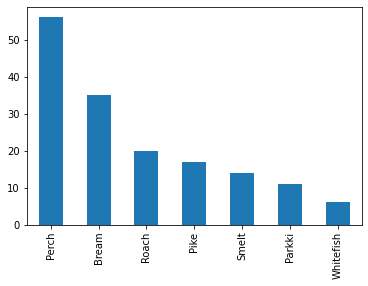

In [88]:
df1['Species'].value_counts().plot(kind='bar')

### 2. Identify outliers and remove if any?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


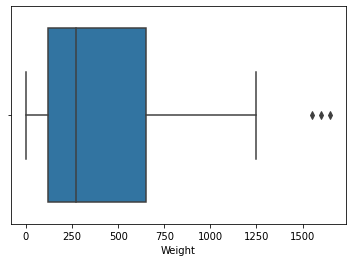

In [89]:
sns.boxplot(df['Weight'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


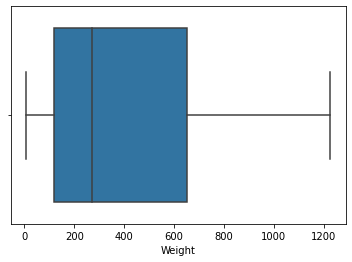

In [90]:
df['Weight']= df['Weight'].clip(upper = df['Weight'].quantile(0.98)) 
df['Weight']= df['Weight'].clip(lower = df['Weight'].quantile(0.01)) 
sns.boxplot(df['Weight'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


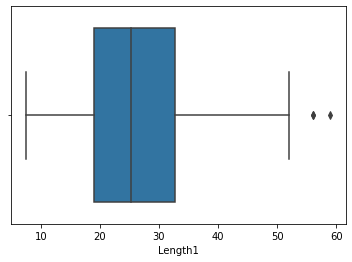

In [91]:
sns.boxplot(df['Length1'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


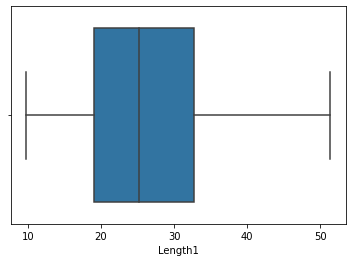

In [92]:
df['Length1']= df['Length1'].clip(upper = df['Length1'].quantile(0.98)) 
df['Length1']= df['Length1'].clip(lower = df['Length1'].quantile(0.01)) 
sns.boxplot(df['Length1'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


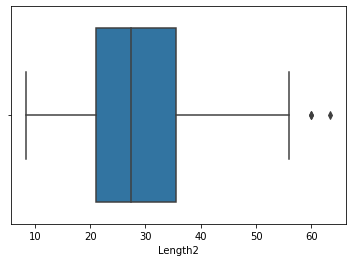

In [93]:
sns.boxplot(df['Length2'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


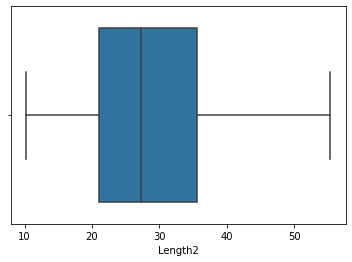

In [94]:
df['Length2']= df['Length2'].clip(upper = df['Length2'].quantile(0.98)) 
df['Length2']= df['Length2'].clip(lower = df['Length2'].quantile(0.01)) 
sns.boxplot(df['Length2'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


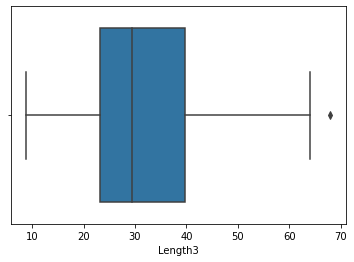

In [95]:
sns.boxplot(df['Length3'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


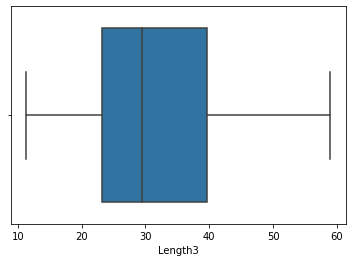

In [96]:
df['Length3']= df['Length3'].clip(upper = df['Length3'].quantile(0.98)) 
df['Length3']= df['Length3'].clip(lower = df['Length3'].quantile(0.01)) 
sns.boxplot(df['Length3'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


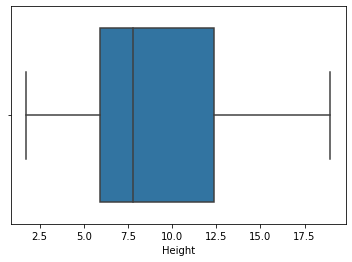

In [97]:
sns.boxplot(df['Height'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


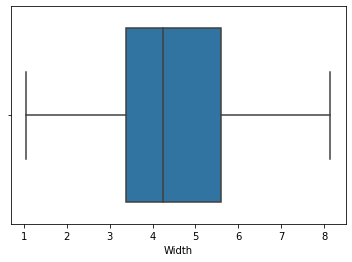

In [98]:
sns.boxplot(df['Width'])

### 3. Build a regression model and print regression equation?

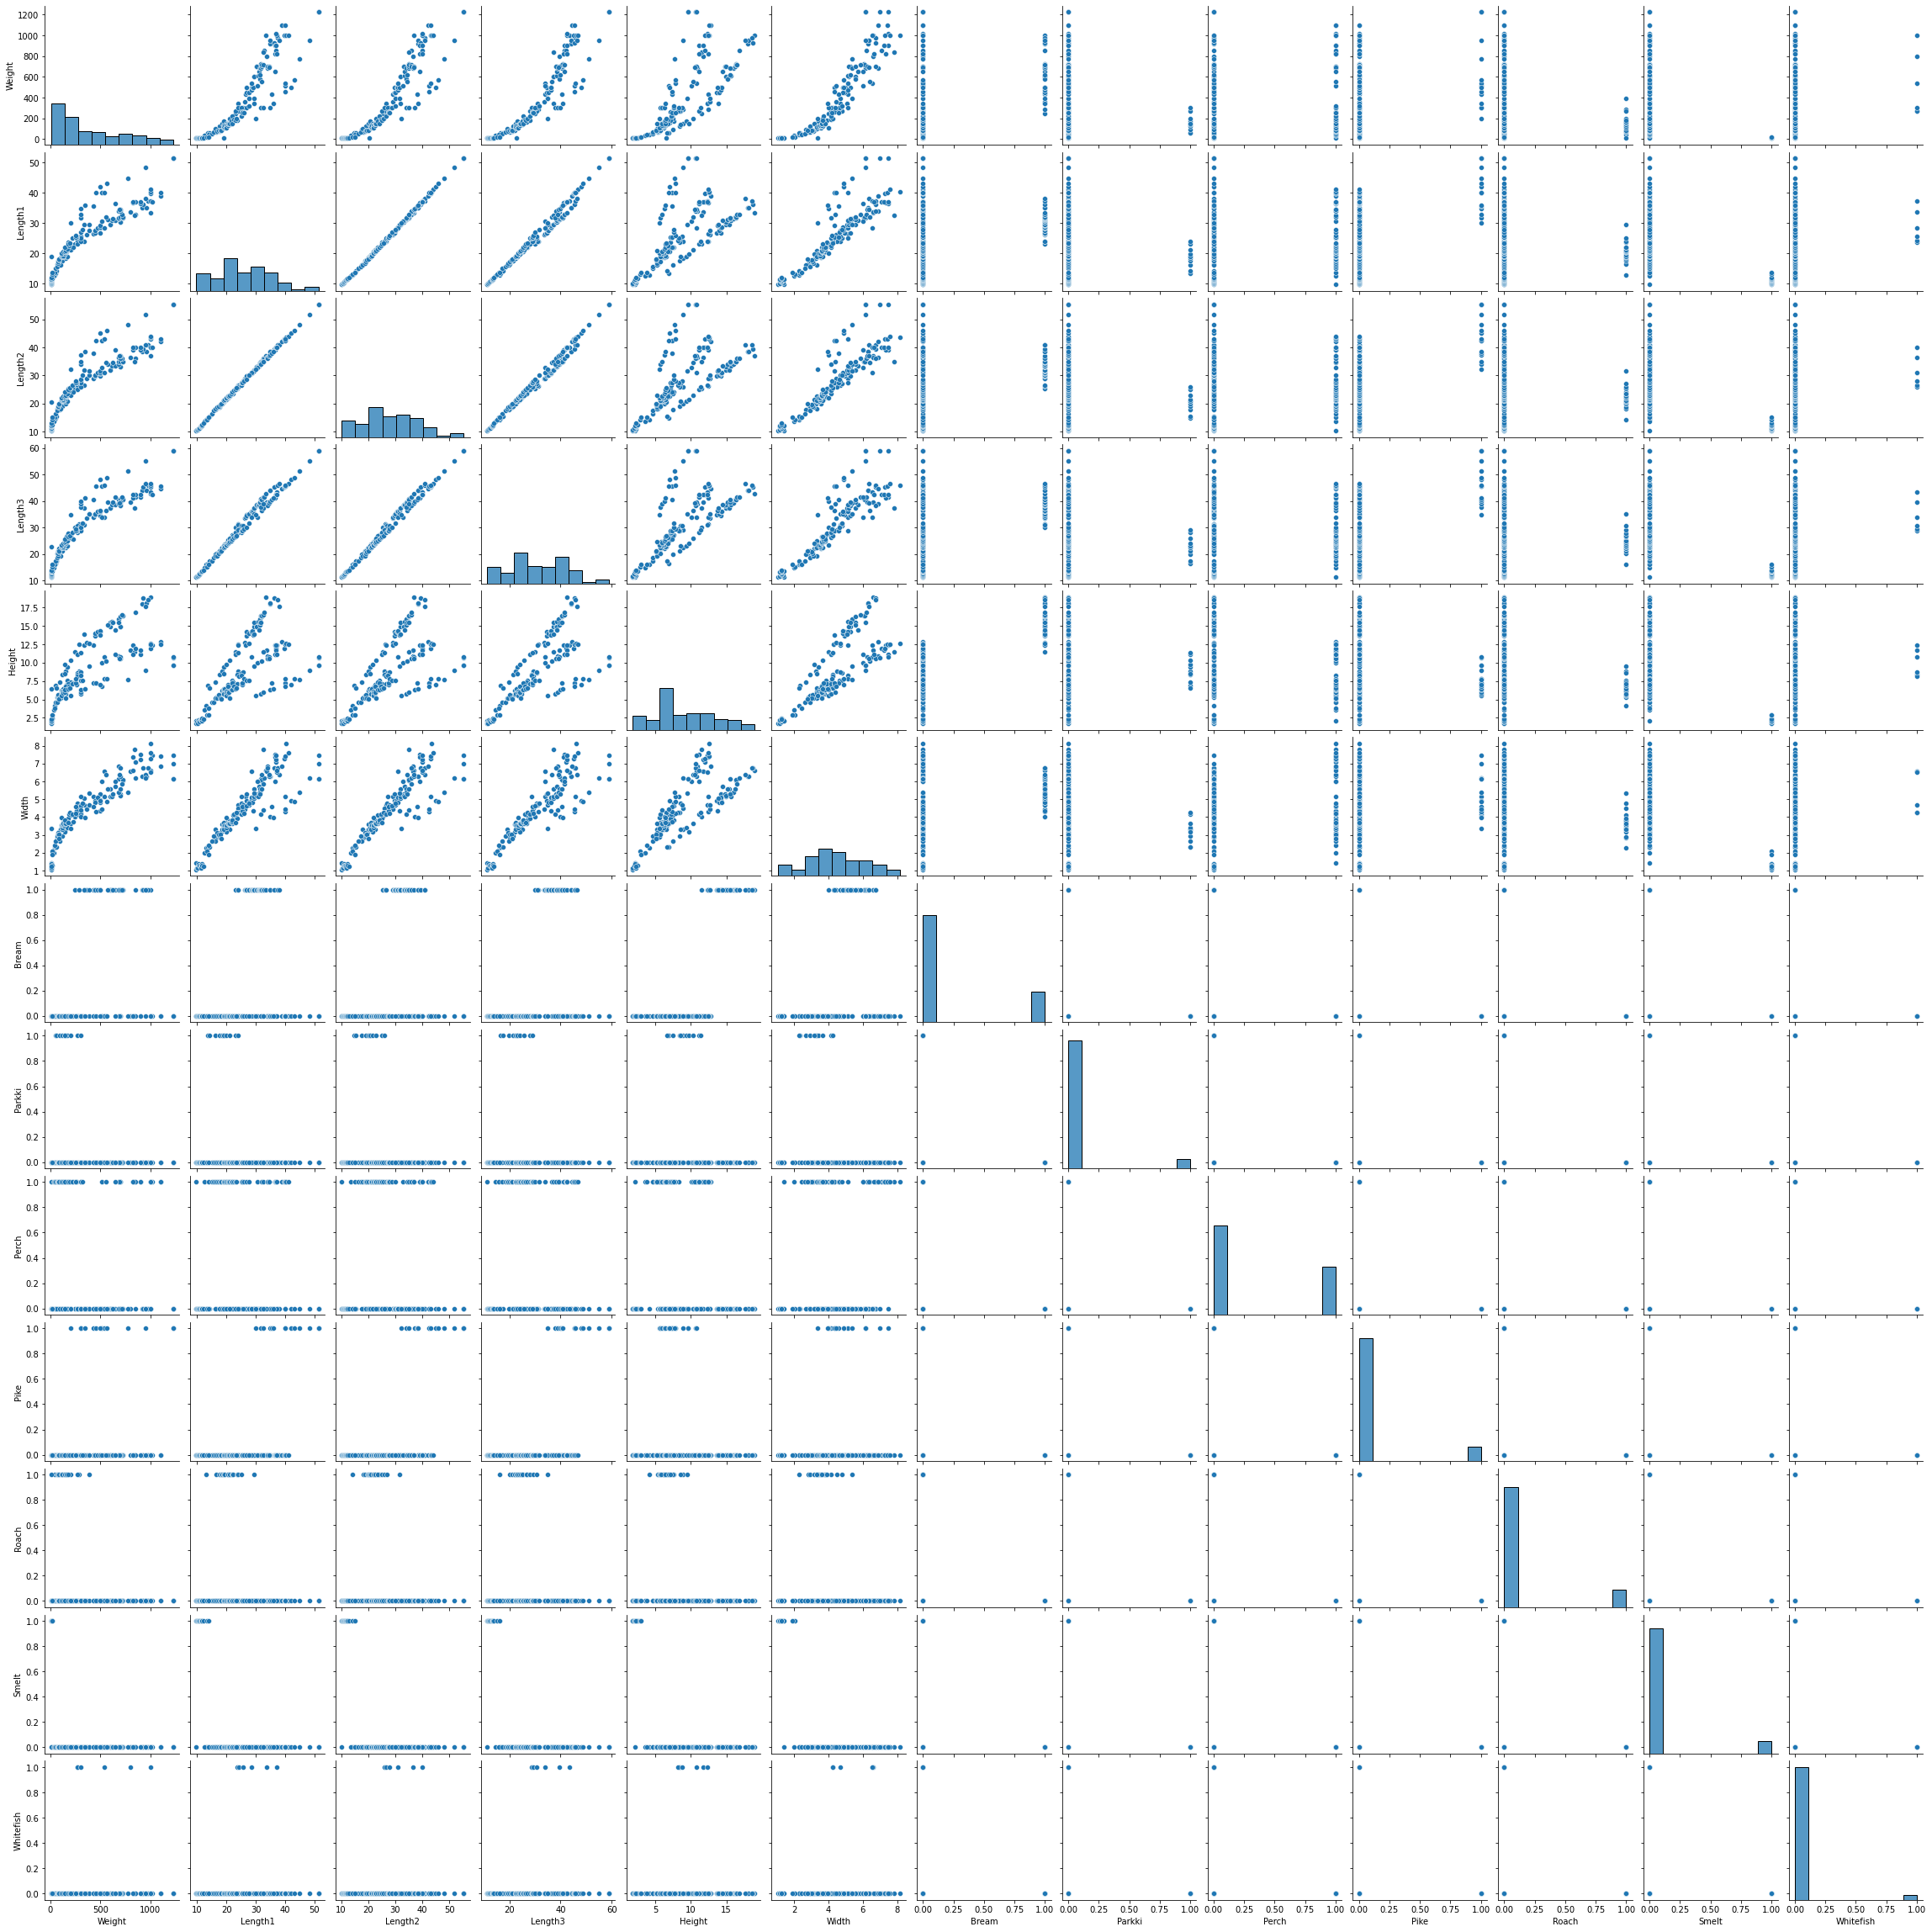

In [99]:
sns.pairplot(df)

# ***Correlation- Matrix***

In [100]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Weight,1.000000,0.909264,0.912611,0.919047,0.764515,0.913844,0.358791,-0.191973,-0.019583,0.268167,-0.269874,-0.351783,0.082506
Length1,0.909264,1.000000,0.999483,0.991499,0.641703,0.879004,0.229208,-0.210427,-0.029062,0.550178,-0.217184,-0.480128,0.054448
Length2,0.912611,0.999483,1.000000,0.993700,0.656868,0.885260,0.246469,-0.210304,-0.027859,0.539143,-0.221769,-0.492174,0.057524
Length3,0.919047,0.991499,0.993700,1.000000,0.721132,0.889267,0.343181,-0.202787,-0.099111,0.507637,-0.208340,-0.500892,0.056517
Height,0.764515,0.641703,0.656868,0.721132,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.913844,0.879004,0.885260,0.889267,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Bream,0.358791,0.229208,0.246469,0.343181,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Parkki,-0.191973,-0.210427,-0.210304,-0.202787,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Perch,-0.019583,-0.029062,-0.027859,-0.099111,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Pike,0.268167,0.550178,0.539143,0.507637,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


# ***Check For VIF***

In [101]:
#Check for VIF,
#If VIF <5, No Multi, VIF: 5-10, Presence of Multi but u can use those columns
#IF VIF >10, Confirm presence of Multi, We need to remove it.
import numpy as np
X = np.array(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)
X = pd.DataFrame(X)

[17.825724371786457, 2114.690497879547, 3695.968832091184, 2066.350840677672, 65.37775525119811, 30.693253249387574, 92.93108451629699, 11.496365279824172, 38.49130454225725, 36.21001245582834, 18.942535501722208, 4.871507584322063, 6.7206991928097635]


In [102]:
X = df.iloc[:,2:]
print(X)
y = df.iloc[:,0:1]
print(y)

     Length2  Length3   Height   Width  ...  Pike  Roach  Smelt  Whitefish
0       25.4     30.0  11.5200  4.0200  ...     0      0      0          0
1       26.3     31.2  12.4800  4.3056  ...     0      0      0          0
2       26.5     31.1  12.3778  4.6961  ...     0      0      0          0
3       29.0     33.5  12.7300  4.4555  ...     0      0      0          0
4       29.0     34.0  12.4440  5.1340  ...     0      0      0          0
..       ...      ...      ...     ...  ...   ...    ...    ...        ...
154     12.2     13.4   2.0904  1.3936  ...     0      0      1          0
155     12.4     13.5   2.4300  1.2690  ...     0      0      1          0
156     13.0     13.8   2.2770  1.2558  ...     0      0      1          0
157     14.3     15.2   2.8728  2.0672  ...     0      0      1          0
158     15.0     16.2   2.9322  1.8792  ...     0      0      1          0

[159 rows x 11 columns]
     Weight
0     242.0
1     290.0
2     340.0
3     363.0
4     430.0
.. 

# ***Split the data into Train & Test***

In [103]:
#Split the data into Train & Test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

In [104]:
from sklearn import linear_model #Parametric Model

In [105]:
regr = linear_model.LinearRegression()

# ***Training the Model***

In [106]:
#Training
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# ***#Testing the model***

In [107]:
#Testing
y_pred = regr.predict(X_test)

In [108]:
#Mean Error Value
#Mean Squared Error 
#Evaluation
import math
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred) #MSE
rmse = math.sqrt(mse)
print(mse)
print(rmse)

8008.180158302104
89.48843589147205


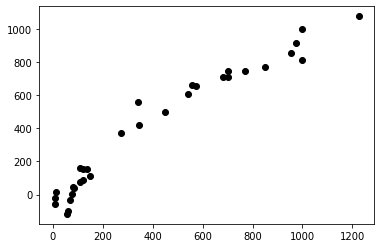

In [109]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')

# ***Coefficient of Determination***

In [110]:
print(r2_score(y_test, y_pred)) #Coefficient of Determination

0.9403899722424769


### 4. What is the mean score of the model at  95% confidence interval?

In [111]:
import numpy as np
import scipy.stats
def mean_confidence_interval(y_pred, confidence=0.95):
    a = 1.0 * np.array(y_pred)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m

In [112]:
mean_score = mean_confidence_interval(y_pred, 0.95)
print(mean_score)

394.4451637777173


### 5. Compare real and predicted weights and give a conclusion statement based on it?

In [113]:
print(y_test)
print(y_pred)

     Weight
136   540.0
110   556.0
148     9.7
89    135.0
31    955.0
127  1000.0
86    120.0
133   345.0
23    680.0
28    850.0
114   700.0
53    272.0
33    975.0
90    110.0
65    150.0
81     85.0
60   1000.0
155    13.4
8     450.0
42    120.0
79     80.0
37     78.0
20    575.0
36     69.0
13    340.0
62     60.0
24    700.0
145     6.7
41    110.0
61     55.0
144  1226.0
139   770.0
[[ 6.05500278e+02]
 [ 6.62567132e+02]
 [-2.14217310e+01]
 [ 1.52156944e+02]
 [ 8.55521000e+02]
 [ 1.00110919e+03]
 [ 1.53852150e+02]
 [ 4.17154031e+02]
 [ 7.10781454e+02]
 [ 7.70158561e+02]
 [ 7.46811677e+02]
 [ 3.74099289e+02]
 [ 9.16751048e+02]
 [ 1.59422402e+02]
 [ 1.11948055e+02]
 [ 4.09401941e+01]
 [ 8.12220922e+02]
 [ 1.70287495e+01]
 [ 4.96288108e+02]
 [ 8.97078522e+01]
 [ 4.86651190e+01]
 [ 3.94404306e-01]
 [ 6.56608644e+02]
 [-3.53820797e+01]
 [ 5.56347727e+02]
 [-1.01052641e+02]
 [ 7.06985276e+02]
 [-5.94070315e+01]
 [ 7.30662526e+01]
 [-1.16858086e+02]
 [ 1.07672205e+03]
 [ 7.43558301e+

In [114]:
#Mean Error Value
#Mean Squared Error 
#Evaluation
import math
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred) #MSE
rmse = math.sqrt(mse)
print(mse)
print(rmse)

8008.180158302104
89.48843589147205


By calculating predicted weights using Linear regression,

Mean Square Error = 8008.18

Root Mean Square Error = 89.48